# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [4]:
# Replace None with your code
# Imports
import sqlite3
import pandas as pd

# Create connection to database/
conn = sqlite3.connect("data.sqlite")

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [5]:
# Replace None with your code
query = """
SELECT customerName, contactLastName, contactFirstName, state, creditLimit
FROM customers
WHERE state = 'CA' AND creditLimit > 25000
"""

california_customers = pd.read_sql_query(query, conn)
california_customers


,customerName,contactLastName,contactFirstName,state,creditLimit
0,Mini Gifts Distributors Ltd.,Nelson,Susan,CA,210500.00
1,Mini Wheels Co.,Murphy,Julie,CA,64600.00
2,Technics Stores Inc.,Hashimoto,Juri,CA,84600.00
3,Toys4GrownUps.com,Young,Julie,CA,90700.00
4,Boards & Toys Co.,Young,Mary,CA,11000.00
5,Collectable Mini Designs Co.,Thompson,Valarie,CA,105000.00
6,Corporate Gift Ideas Co.,Brown,Julie,CA,105000.00
7,"Men 'R' US Retailers, Ltd.",Chandler,Brian,CA,57700.00
8,The Sharp Gifts Warehouse,Frick,Sue,CA,77600.00
9,West Coast Collectables Co.,Thompson,Steve,CA,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [6]:
# Replace None with your code
query = """
SELECT customerName, country
FROM customers
WHERE country != 'USA' AND customerName LIKE '%Collect%'
"""

international_collectors = pd.read_sql_query(query, conn)
international_collectors


,customerName,country
0,"Australian Collectors, Co.",Australia
1,"Clover Collections, Co.",Ireland
2,"UK Collectables, Ltd.",UK
3,"King Kong Collectables, Co.",Hong Kong
4,Heintze Collectables,Denmark
5,"Royal Canadian Collectables, Ltd.",Canada
6,BG&E Collectables,Switzerland
7,Reims Collectables,France
8,Precious Collectables,Switzerland
9,Salzburg Collectables,Austria


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

### I used the WHERE clause to filter out only the customers that are not from the USA and have “Collect” in their name. The condition country != 'USA' removes all U.S. customers. The condition customerName LIKE '%Collect%' checks if the word “Collect” appears anywhere in the customer’s name. This makes sure we only see international customers that match the theme of the campaign.

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [7]:
# Replace None with your code
query = """
SELECT state, AVG(creditLimit) AS avg_credit_limit
FROM customers
WHERE country = 'USA'
GROUP BY state
ORDER BY avg_credit_limit DESC
"""

state_credit_limits = pd.read_sql_query(query, conn)
state_credit_limits


,state,avg_credit_limit
0,NH,114200.000000
1,NY,89966.666667
2,PA,84766.666667
3,CA,83854.545455
4,NV,71800.000000
5,MA,70755.555556
6,CT,57350.000000
7,NJ,43000.000000


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

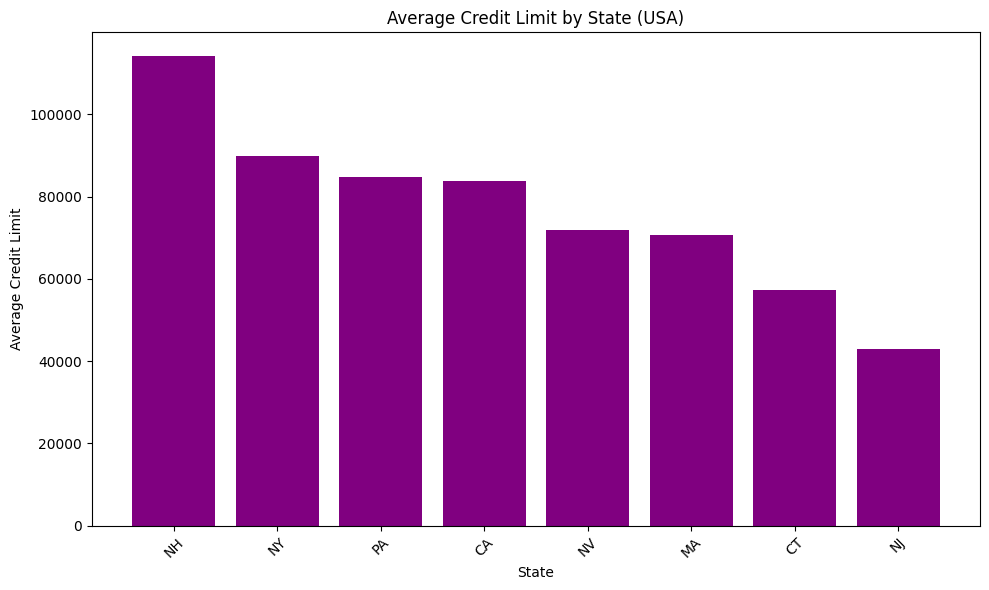

In [12]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(state_credit_limits['state'], state_credit_limits['avg_credit_limit'], color='purple')
plt.title('Average Credit Limit by State (USA)')
plt.xlabel('State')
plt.ylabel('Average Credit Limit')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [9]:
# Replace None with your code
query = """
SELECT c.customerName, SUM(p.amount) AS total_payments
FROM customers c
JOIN payments p ON c.customerNumber = p.customerNumber
GROUP BY c.customerName
ORDER BY total_payments DESC
LIMIT 10
"""

top_customers = pd.read_sql_query(query, conn)
top_customers


,customerName,total_payments
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

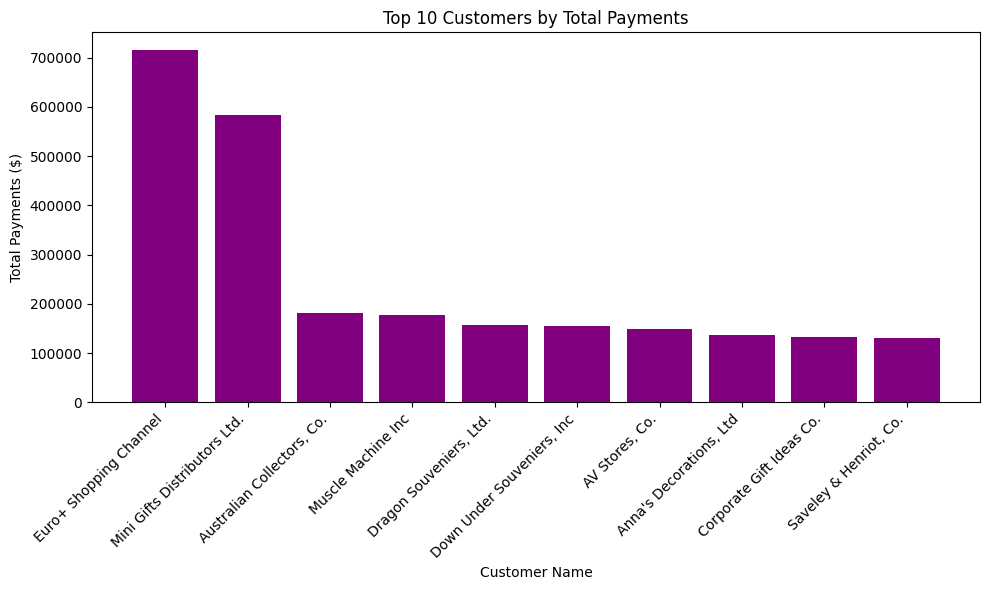

In [11]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
plt.figure(figsize=(10, 6))
plt.bar(top_customers['customerName'], top_customers['total_payments'], color='purple')
plt.title('Top 10 Customers by Total Payments')
plt.xlabel('Customer Name')
plt.ylabel('Total Payments ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [13]:
# Replace None with you code
query = """
SELECT c.customerName, p.productName, SUM(od.quantityOrdered) AS total_quantity
FROM customers c
JOIN orders o ON c.customerNumber = o.customerNumber
JOIN orderdetails od ON o.orderNumber = od.orderNumber
JOIN products p ON od.productCode = p.productCode
GROUP BY c.customerName, p.productName
HAVING total_quantity >= 10
ORDER BY total_quantity ASC
"""

popular_products = pd.read_sql_query(query, conn)
popular_products



,customerName,productName,total_quantity
0,"Extreme Desk Decorations, Ltd",1961 Chevrolet Impala,10
1,Petit Auto,1913 Ford Model T Speedster,10
2,La Rochelle Gifts,1954 Greyhound Scenicruiser,11
3,Tekni Collectables Inc.,American Airlines: B767-300,11
4,The Sharp Gifts Warehouse,1969 Chevrolet Camaro Z28,13
...,...,...,...
2526,Euro+ Shopping Channel,2002 Chevy Corvette,174
2527,Euro+ Shopping Channel,1957 Chevy Pickup,183
2528,Euro+ Shopping Channel,1970 Dodge Coronet,197
2529,Euro+ Shopping Channel,1958 Chevy Corvette Limited Edition,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [14]:
# Replace None with your code
query = """
SELECT pl.productLine, 
       COUNT(DISTINCT p.productCode) AS num_products,
       SUM(od.quantityOrdered) AS total_quantity
FROM productlines pl
JOIN products p ON pl.productLine = p.productLine
JOIN orderdetails od ON p.productCode = od.productCode
GROUP BY pl.productLine
"""

product_line_stats = pd.read_sql_query(query, conn)
product_line_stats


,productLine,num_products,total_quantity
0,Classic Cars,37,35582
1,Motorcycles,13,12778
2,Planes,12,11872
3,Ships,9,8532
4,Trains,3,2818
5,Trucks and Buses,11,11001
6,Vintage Cars,24,22933


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

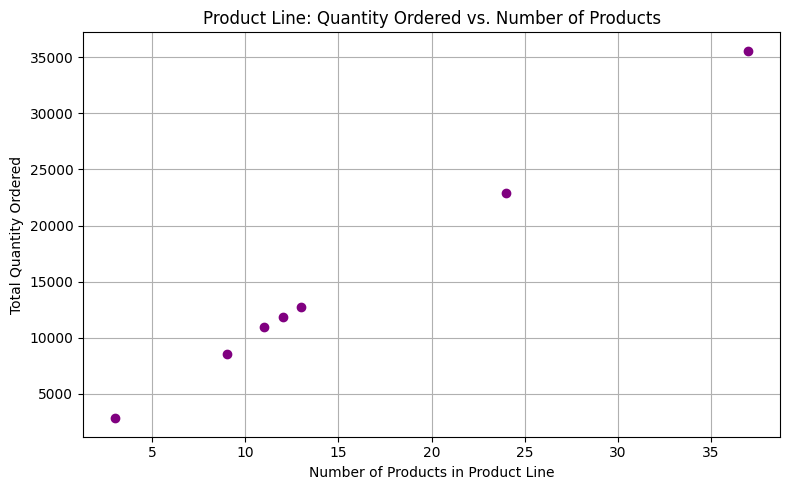

In [16]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered
plt.figure(figsize=(8, 5))
plt.scatter(product_line_stats['num_products'], product_line_stats['total_quantity'], color='purple')
plt.title('Product Line: Quantity Ordered vs. Number of Products')
plt.xlabel('Number of Products in Product Line')
plt.ylabel('Total Quantity Ordered')
plt.grid(True)
plt.tight_layout()
plt.show()


## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

### I used a scatter plot because it is good for showing relationships between two things. In this case, the chart shows the number of products in each product line (on the bottom) and how much customers ordered from that line (on the side). This helps the company see if having more products in a line means customers are buying more. It’s easy to compare and spot patterns using dots.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [17]:
# Replace None with your code
query = """
SELECT e.firstName, e.lastName, e.jobTitle, e.reportsTo, e.officeCode
FROM employees e
WHERE e.officeCode IN (
    SELECT officeCode
    FROM employees
    GROUP BY officeCode
    HAVING COUNT(*) < 5
)
"""

remote_office_employees = pd.read_sql_query(query, conn)
remote_office_employees


,firstName,lastName,jobTitle,reportsTo,officeCode
0,William,Patterson,Sales Manager (APAC),1056,6
1,Julie,Firrelli,Sales Rep,1143,2
2,Steve,Patterson,Sales Rep,1143,2
3,Foon Yue,Tseng,Sales Rep,1143,3
4,George,Vanauf,Sales Rep,1143,3
5,Larry,Bott,Sales Rep,1102,7
6,Barry,Jones,Sales Rep,1102,7
7,Andy,Fixter,Sales Rep,1088,6
8,Peter,Marsh,Sales Rep,1088,6
9,Tom,King,Sales Rep,1088,6


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

### I used a subquery to find offices that have fewer than 5 employees. I did this by grouping the employees by office and using HAVING COUNT(*) < 5. Then I used that subquery inside the main query to find the employees who work in those offices. This helps show only the people that need support for remote work.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [18]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [19]:
# Run this cell without changes
import zipfile

zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [45]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# SQL query to get top 10 genres by average rating
query = """
SELECT 
    TRIM(SUBSTR(genres, 1, INSTR(genres, ',') - 1)) AS primary_genre,
    COUNT(*) AS movie_count,
    AVG(mr.averagerating) AS avg_rating
FROM movie_basics mb
JOIN movie_ratings mr ON mb.movie_id = mr.movie_id
WHERE mb.start_year BETWEEN 2010 AND 2019
  AND genres IS NOT NULL
  AND TRIM(SUBSTR(genres, 1, INSTR(genres, ',') - 1)) != ''
  AND mr.averagerating IS NOT NULL
GROUP BY primary_genre
HAVING movie_count >= 5
ORDER BY avg_rating DESC
LIMIT 10
"""

genre_ratings = pd.read_sql_query(query, conn4)
genre_ratings




,primary_genre,movie_count,avg_rating
0,Documentary,3649,7.381036
1,Biography,3270,7.190245
2,Animation,614,6.447231
3,Thriller,8,6.400000
4,Adventure,2420,6.395000
5,Music,16,6.312500
6,Crime,2226,6.187871
7,Drama,6960,6.164181
8,Comedy,9036,6.135480
9,Musical,21,5.971429


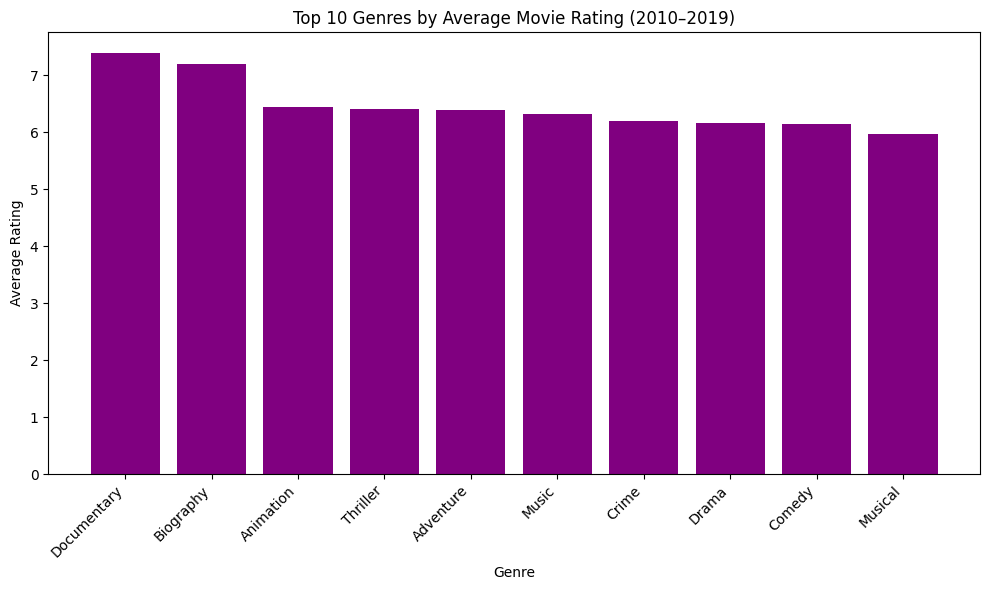

In [51]:
plt.figure(figsize=(10, 6))
plt.bar(genre_ratings['primary_genre'], genre_ratings['avg_rating'], color='purple')
plt.title('Top 10 Genres by Average Movie Rating (2010–2019)')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
